In [4]:
import sys
sys.path.append('../')

from model import DecisionTree
from rule import RuleExtractor

import os
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [5]:
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../data/"

pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))

# One vs Rest Decision Tree

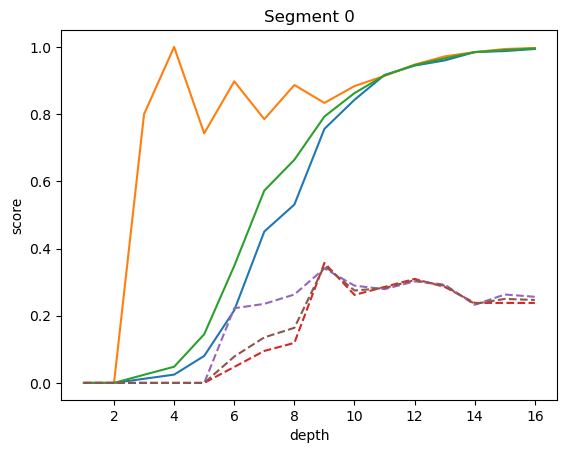

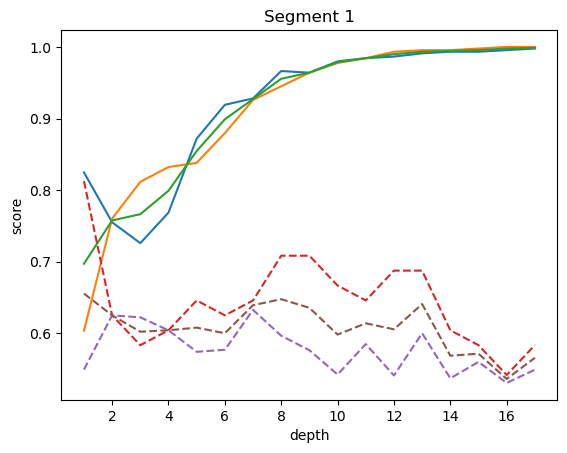

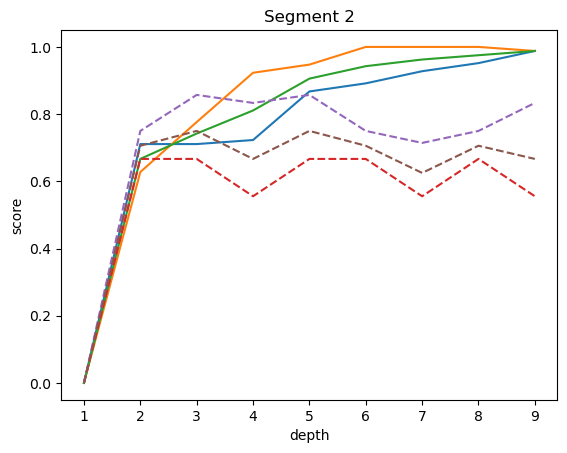

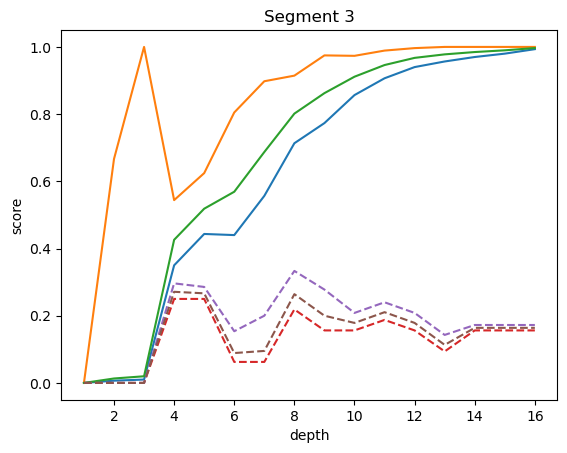

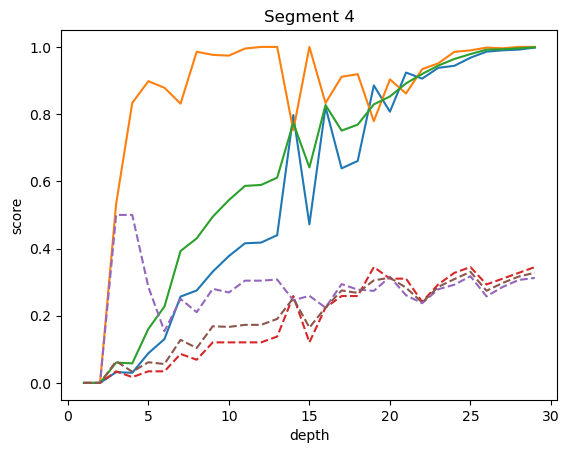

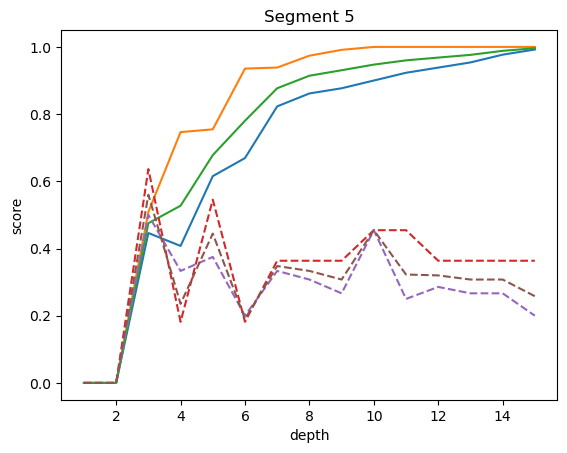

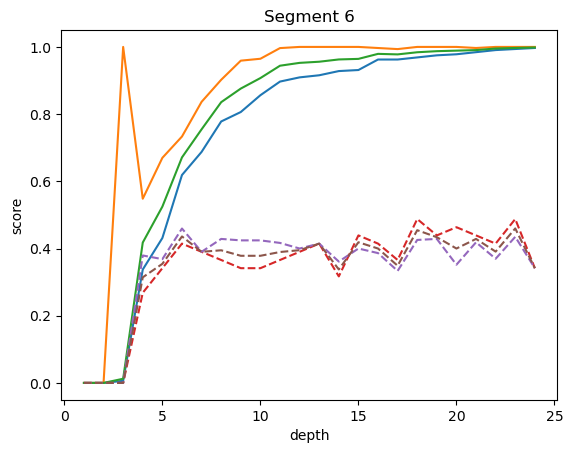

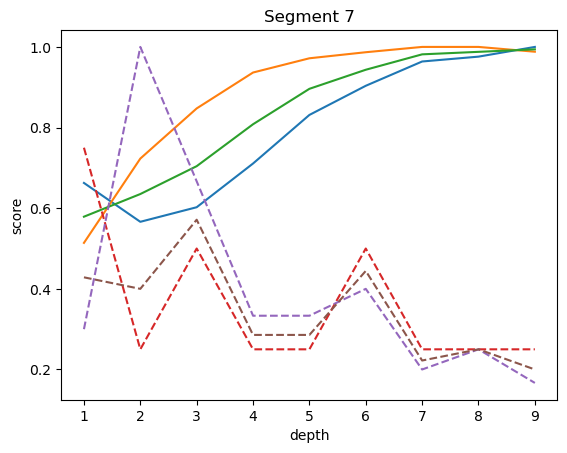

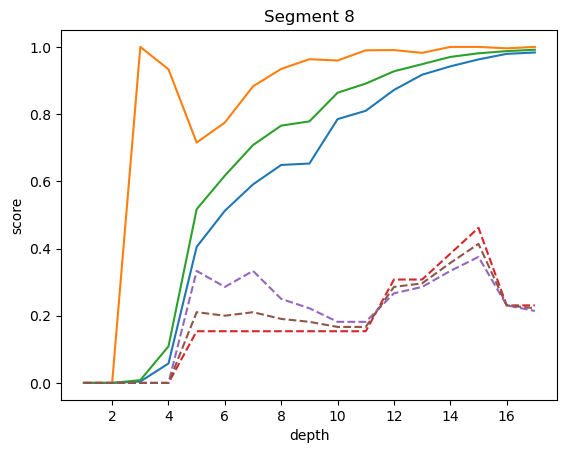

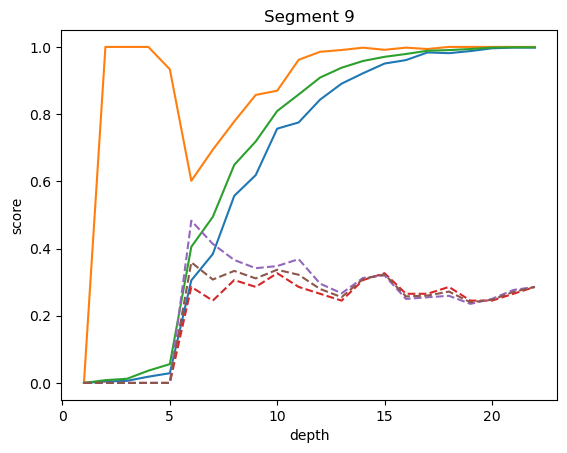

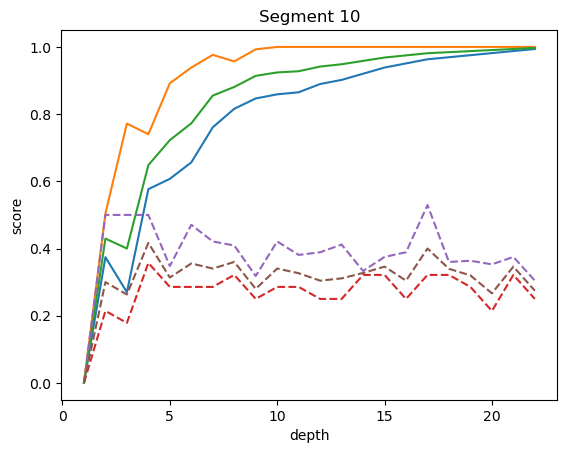

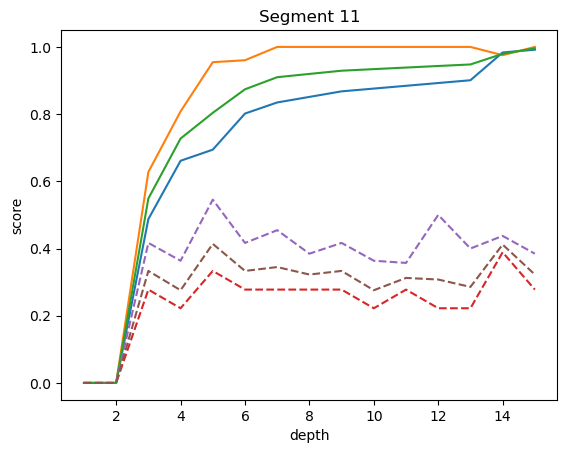

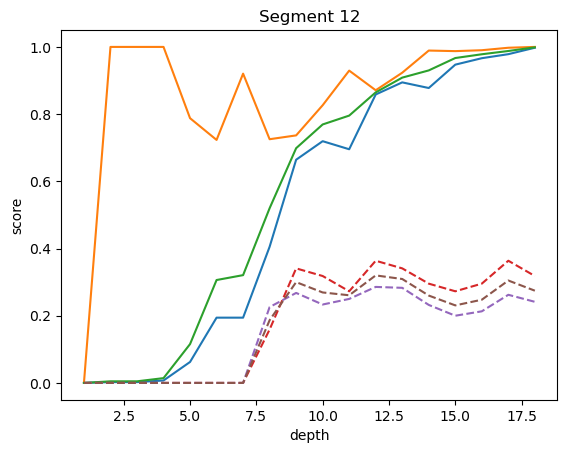

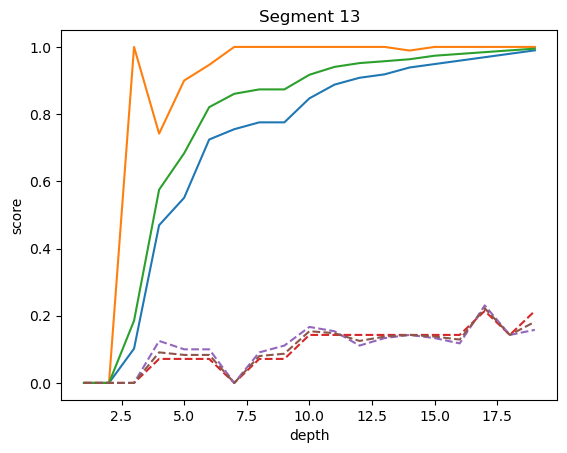

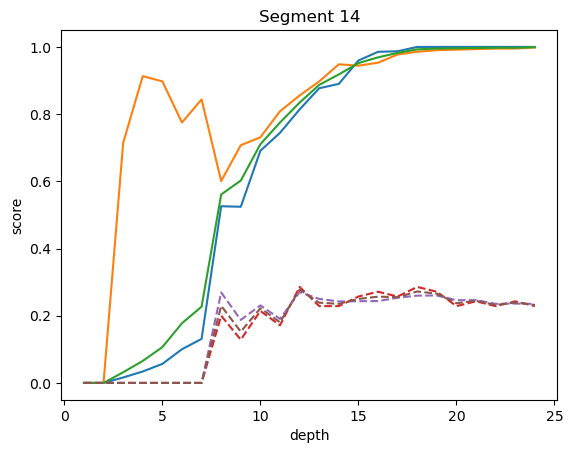

In [6]:
model = DecisionTree(pivot_df, embedding, validation=True)
k = 15
result = []
for i in range(k):
    model.kmeans_target(i)
    model.class_names = [str(i) for i in range(2)]
    score_list, val_score_list = model.get_all_depth(scoring='all', visualize=False)

    r_list = [] 
    p_list = []
    f_list = []

    vr_list = [] 
    vp_list = []
    vf_list = []

    for score, val_score in zip(score_list, val_score_list):
        r_list.append(score[0])
        p_list.append(score[1])
        f_list.append(score[2])

        vr_list.append(val_score[0])
        vp_list.append(val_score[1])
        vf_list.append(val_score[2])

    plt.plot(range(1, model.max_depth), r_list, label='train recall')
    plt.plot(range(1, model.max_depth), p_list, label='train precision')
    plt.plot(range(1, model.max_depth), f_list, label='train f1-score')

    plt.plot(range(1, model.max_depth), vr_list, '--', label='test recall')
    plt.plot(range(1, model.max_depth), vp_list, '--', label='test precision')
    plt.plot(range(1, model.max_depth), vf_list, '--', label='test f1-score')

    plt.title(f'Segment {i}')
    plt.xlabel('depth')
    plt.ylabel('score')

    plt.show()

In [7]:
print('One vs All Decision Tree\n')

print('Train')
print(f'recall: {np.mean(r_list):.3f}')
print(f'precision: {np.mean(p_list):.3f}')
print(f'f1_score: {np.mean(f_list):.3f}')

print('\nValidation')
print(f'recall: {np.mean(vr_list):.3f}')
print(f'precision: {np.mean(vp_list):.3f}')
print(f'f1_score: {np.mean(vf_list):.3f}')

One vs All Decision Tree

Train
recall: 0.639
precision: 0.813
f1_score: 0.657

Validation
recall: 0.165
precision: 0.171
f1_score: 0.168


# Multi-Class Decision Tree

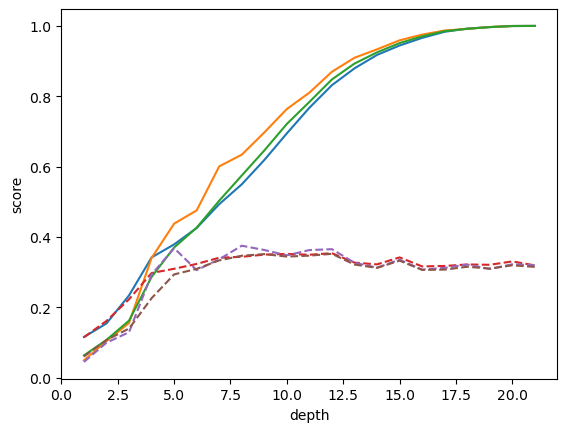

In [8]:
model = DecisionTree(pivot_df, embedding, validation=True)
score_list, val_score_list = model.get_all_depth(scoring='all', visualize=False)

r_list = [] 
p_list = []
f_list = []

vr_list = [] 
vp_list = []
vf_list = []

for score, val_score in zip(score_list, val_score_list):
    r_list.append(score[0])
    p_list.append(score[1])
    f_list.append(score[2])

    vr_list.append(val_score[0])
    vp_list.append(val_score[1])
    vf_list.append(val_score[2])

plt.plot(range(1, model.max_depth), r_list, label='train recall')
plt.plot(range(1, model.max_depth), p_list, label='train precision')
plt.plot(range(1, model.max_depth), f_list, label='train f1-score')

plt.plot(range(1, model.max_depth), vr_list, '--', label='test recall')
plt.plot(range(1, model.max_depth), vp_list, '--', label='test precision')
plt.plot(range(1, model.max_depth), vf_list, '--', label='test f1-score')

plt.xlabel('depth')
plt.ylabel('score')
plt.show()

In [15]:
print('Multi Class Decision Tree\n')

print('Train')
print(f'recall: {score[0]:.3f}')
print(f'precision: {score[1]:.3f}')
print(f'f1_score: {score[2]:.3f}')

print('\nValidation')
print(f'recall: {val_score[0]:.3f}')
print(f'precision: {val_score[1]:.3f}')
print(f'f1_score: {val_score[2]:.3f}')

Multi Class Decision Tree

Train
recall: 0.831
precision: 0.870
f1_score: 0.848

Validation
recall: 0.354
precision: 0.365
f1_score: 0.352
